# GENRE CLASSIFICATION
## [SPOTIFY TRACKS DB](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db)


In [4]:
#Only for Google Colab
from google.colab import files
uploaded = files.upload()

Saving SpotifyFeatures.csv to SpotifyFeatures.csv


## Data Loading

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import io



#Data Characteristics
spotify_data = pd.read_csv('SpotifyFeatures.csv')
display(spotify_data.head())
display(spotify_data.info())
display(spotify_data.describe())
print("\nUnique genres: ", pd.unique(spotify_data['genre']))


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

None

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000



Unique genres:  ['Movie' 'R&B' 'A Capella' 'Alternative' 'Country' 'Dance' 'Electronic'
 'Anime' 'Folk' 'Blues' 'Opera' 'Hip-Hop' "Children's Music"
 'Children’s Music' 'Rap' 'Indie' 'Classical' 'Pop' 'Reggae' 'Reggaeton'
 'Jazz' 'Rock' 'Ska' 'Comedy' 'Soul' 'Soundtrack' 'World']


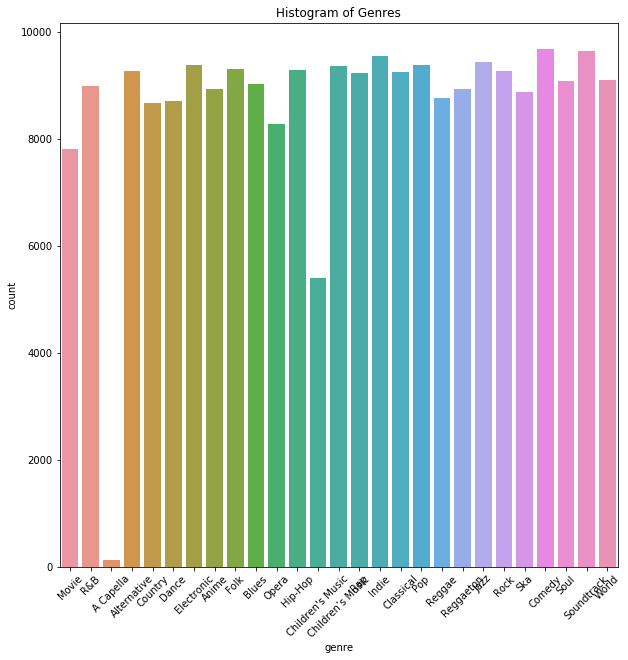

In [0]:
#Bar Chart to show distribution of Genres
plt.subplots(figsize=(10,10))
sn.countplot(spotify_data['genre'])
plt.title('Histogram of Genres')
plt.xticks(rotation=45)
plt.show()



## Encoding:
artist_name: remove 
track_name: remove  
track_id: remove  
key: Factorize by musical scale from 0 to 12, tested with one hot and factorized, feature importance was much greater when factorized  
mode: Binary Encode: Major = 1, Minor = 0  
time_signature: Will convert to linear scale  
genres: Will one hot encode genres  
Condense duplicates and one hot encode songs to show multiple genres  


In [2]:
def one_hot_encode(df, column_name):
    """
    Function to one hot encode a column and remove the old column from data frame
    :param df: pandas data frame that needs encoding
    :param column_name: name of column
    :returns: pandas data frame with one hot encoded columns
    """
    df_one_hot = df.copy()
    df_one_hot = pd.concat([df_one_hot,pd.get_dummies(df_one_hot[column_name], prefix=column_name)],axis=1)
    df_one_hot.drop([column_name],axis=1, inplace=True)
    return df_one_hot



In [3]:
#Factorized Data
#Factorize columns that are strings
def factorized_column(df, column_name):
    """
    Function to factorize a column in a pandas dataframe
    :param df: pandas data frame that needs encoding
    :param column_name: name of column
    :returns: pandas data frame with factorized column and mapping of encoding
    """
    df_factorized = df.copy()
    df_factorized[column_name], mapping = pd.factorize(df[column_name])
    return df_factorized, mapping



In [4]:
#Checking for incomplete data
print("Amount of Null in Data: ", spotify_data.isnull().sum().sum())
print("Amount of N/A in Data: ", spotify_data.isna().sum().sum())
print("No incomplete data")

#Encoding Data as per Encoding Section
spotify_data_encoded = spotify_data.copy()
spotify_data_encoded = one_hot_encode(spotify_data_encoded,'genre')

mode_dictionary = {'Major' : 1, 'Minor' : 0}
spotify_data_encoded['mode'].replace(mode_dictionary, inplace=True)
time_dictionary = {'0/4' : 0, '1/4' : 1, '3/4': 1, '4/4': 4,'5/4': 5}
spotify_data_encoded['time_signature'].replace(time_dictionary, inplace=True)
key_dictionary = {'C' : 1, 'C#' : 2, 'D' : 3, 'D#' : 4, 'E' : 5, 'F' : 6, 'F#' : 7, 'G' : 9, 'G#' : 10, 'A' : 11, 'A#' : 12, 'B' : 12}
spotify_data_encoded['key'].replace(key_dictionary, inplace=True)

print("Encoded key, genre, mode, time_signature")

genre_column_list = []
for genre in pd.unique(spotify_data['genre']):
    genre_column_list.append("genre_"+genre)

#Deleting Duplicates in data with exact values in track_id
#Spotify will categorize 1 unique song into multiple genres
#We will take the first genre that the song is categorized into
spotify_data_encoded = spotify_data_encoded.drop_duplicates(subset='track_id', keep='first')

#Consolodating duplicate tracks to 1 row with one hot encoding of genres
#Will take some time
print("Starting to make track dictionary")
trackid_to_genre_dict = {}
for index, row in spotify_data.iterrows():
    track_id = row['track_id']
    genre = row['genre']
    if track_id in trackid_to_genre_dict:
        trackid_to_genre_dict[track_id].append(genre)
    else:
        trackid_to_genre_dict[track_id] = [genre]
#display(trackid_to_genre_dict)
print("Done making track dictionary")

print("Starting to condense tracks to encoded dataframe")

for index, row in spotify_data_encoded.iterrows():    
    track_id = row['track_id']
    genre_list = trackid_to_genre_dict[track_id]
    for genre in genre_list:
        genre_label = "genre_"+ genre
        spotify_data_encoded.at[index,genre_label] = 1

print("Done condensing tracks to encoded dataframe")

print("Total Songs that were removed due to duplication: ", (spotify_data.shape[0] - spotify_data_encoded.shape[0]))
spotify_data_encoded.drop(['track_name'],axis=1, inplace=True)
spotify_data_encoded.drop(['track_id'],axis=1, inplace=True)
spotify_data_encoded.drop(['artist_name'],axis=1, inplace=True)



"""
#Failed attempts
#Takes way too long

unique_track_list = spotify_data_encoded['track_id']
for track in unique_track_list:
    query_df = spotify_data_encoded.query('track_id == "'+ str(track) + '"')
    for genre in genre_column_list:
        has_true = (query_df[genre] == 1).tolist()
        if True in has_true:
            for index in query_df.index.values.tolist():
                spotify_data_encoded.at[index,genre]=1

Another attempt to get rows done
for index, row in spotify_data.iterrows():
    if(index%1000 == 0):
        print(index)
    track_id = row['track_id']
    index_track = spotify_data_non_duplicates.index[spotify_data_non_duplicates['track_id'] == track_id].tolist()[0]
    genre = row['genre']
    genre_label = "genre_"+ genre
    spotify_data_non_duplicates.at[index_track,genre_label] = 1
"""
print("\nspotify_data_encoded is clean data")
print("\nspotify_data is original data")


Amount of Null in Data:  0
Amount of N/A in Data:  0
No incomplete data
Encoded key, genre, mode, time_signature
Starting to make track dictionary
Done making track dictionary
Starting to condense tracks to encoded dataframe
Done condensing tracks to encoded dataframe
Total Songs that were removed due to duplication:  55951

spotify_data_encoded is clean data

spotify_data is original data


In [5]:
#Standardizing the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

spotify_features = spotify_data_encoded.drop(genre_column_list,axis=1)
spotify_target = spotify_data_encoded[genre_column_list]

scaler.fit(spotify_features)
spotify_feature_scaler = scaler.transform(spotify_features)
spotify_feature_scaler = pd.DataFrame(spotify_feature_scaler, index=spotify_features.index, columns=spotify_features.columns)

display(spotify_feature_scaler.head())
display(spotify_target.head())


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,-2.085747,0.564740,-0.798733,-1.047822,1.279646,-0.532841,-1.180332,0.575611,1.299283,0.718210,-0.366515,1.588677,0.355914,1.353170
1,-2.028246,-0.431708,0.257016,-0.756663,0.652467,-0.532841,0.111703,-0.348444,0.715907,-1.392351,-0.198661,1.813226,0.355914,1.360637
2,-1.913244,1.495668,0.640447,-0.504626,-1.544471,-0.532841,-1.438739,-0.575904,-0.585001,-1.392351,-0.446282,-0.565544,1.323157,-0.312134
3,-2.085747,0.815900,-1.581352,-0.641318,-0.837536,-0.532841,-1.180332,-0.597228,-0.319034,0.718210,-0.430133,1.741558,0.355914,-0.838608
4,-1.855743,1.490208,-1.103376,-1.176146,-1.203692,-0.151959,-0.146704,-0.106768,-1.721889,0.718210,-0.400281,0.746124,0.355914,-0.229989


,genre_Movie,genre_R&B,genre_A Capella,genre_Alternative,genre_Country,genre_Dance,genre_Electronic,genre_Anime,genre_Folk,genre_Blues,...,genre_Pop,genre_Reggae,genre_Reggaeton,genre_Jazz,genre_Rock,genre_Ska,genre_Comedy,genre_Soul,genre_Soundtrack,genre_World
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Feature Selection

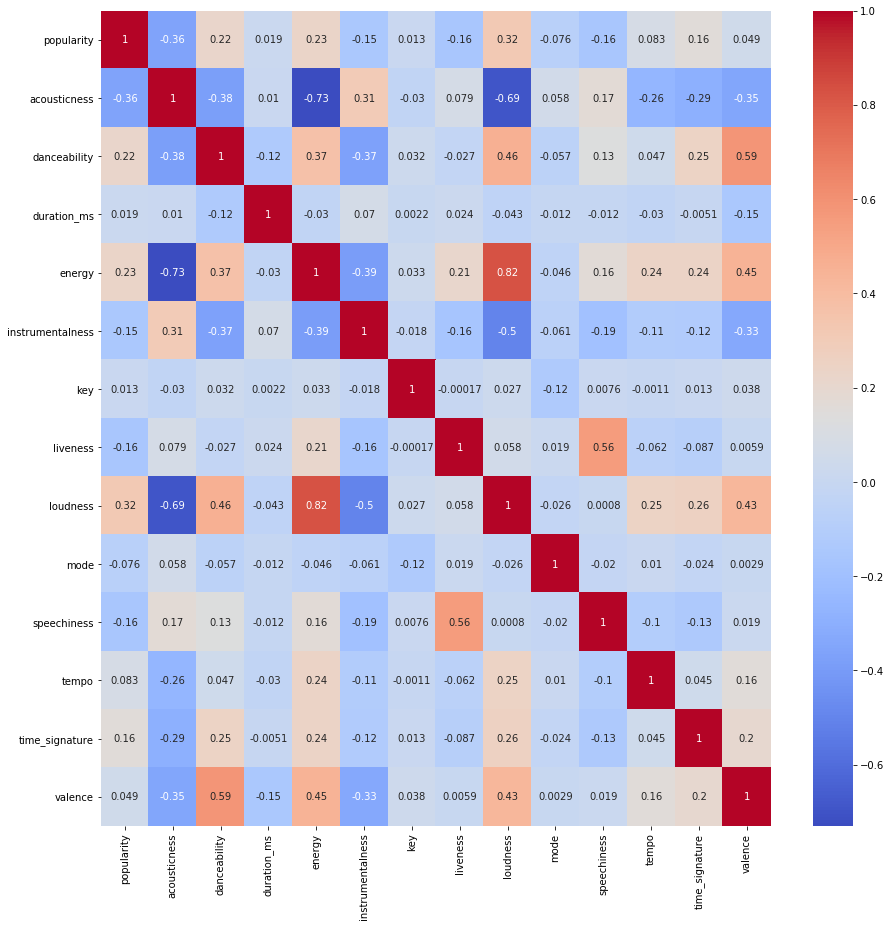

In [6]:

#Find Correlations within data and plotting them on heat map
corr_matric = spotify_feature_scaler.corr()
plt.subplots(figsize=(15,15))
sn.heatmap(corr_matric, annot=True, cmap="coolwarm")
plt.show()

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   25.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  1.0min finished


Text(0.5, 1.0, 'Feature Importance using ExtraTreeClassidier')

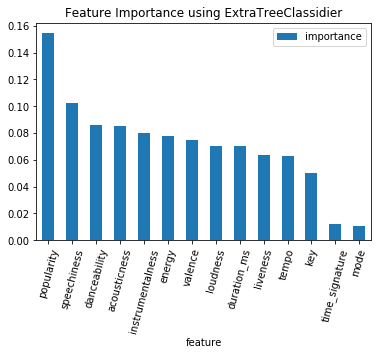

In [7]:
#Feature Selection using importance from model
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(verbose=True,n_jobs=4)
model.fit(spotify_feature_scaler, spotify_target)
# display the relative importance of each attribute

feats = [] # a dict to hold feature_name: feature_importance
for feature, importance in zip(spotify_feature_scaler.columns, model.feature_importances_):
    feats.append([feature, importance]) #add the name/value pair 

sorted_importances = sorted(feats,key=lambda i:i[1], reverse=True)
sorted_importances= pd.DataFrame(np.array(sorted_importances), columns=['feature','importance'])
sorted_importances['importance'] = pd.to_numeric(sorted_importances['importance'])
sorted_importances.plot.bar(x='feature', y='importance', rot=75)
plt.title("Feature Importance using ExtraTreeClassidier")


In [8]:
#Feature Selection using importance from model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(verbose=True,n_jobs=4)
model.fit(spotify_feature_scaler, spotify_target)
# display the relative importance of each attribute

feats = [] # a dict to hold feature_name: feature_importance
for feature, importance in zip(spotify_feature_scaler.columns, model.feature_importances_):
    feats.append([feature, importance]) #add the name/value pair 
sorted_importances = sorted(feats,key=lambda i:i[1], reverse=True)
sorted_importances= pd.DataFrame(np.array(sorted_importances), columns=['feature','importance'])
sorted_importances['importance'] = pd.to_numeric(sorted_importances['importance'])
sorted_importances.plot.bar(x='feature', y='importance', rot=75)
plt.title("Feature Importance using RandomTreeClassidier")

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


KeyboardInterrupt: 

In [ ]:
# Recursive Feature Elimination for genre_Rap, did perform on other columns and had same result
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=4)

# create the RFE model and select 3 attributes
rfe = RFE(model, 1,verbose=True)
rfe = rfe.fit(spotify_feature_scaler,spotify_target['genre_Rap'])
# summarize the selection of the attributes

feats = [] # a dict to hold feature_name: feature_importance
for feature, importance in zip(spotify_feature_scaler.columns, rfe.ranking_):
    feats.append([feature, importance]) #add the name/value pair 
sorted_importances = sorted(feats,key=lambda i:i[1], reverse=False)
sorted_importances= pd.DataFrame(np.array(sorted_importances), columns=['feature','importance'])
sorted_importances['importance'] = pd.to_numeric(sorted_importances['importance'])
display(sorted_importances)



# Model Training

## Knn

In [0]:
#Test KNN on Data
#Starting Point for KNN

from sklearn.neighbors import KNeighborsClassifier

k_neighbors = 3
neigh = KNeighborsClassifier(n_neighbors=k_neighbors)
X_train, X_test, y_train, y_test = train_test_split(spotify_feature_scaler, spotify_target, test_size=0.33,random_state = 42)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))






0.3176254799780581


## Accuracy Score

In [9]:
def raw_accuracy(y_pred,y_test):
    """
    counts how many 0==0 and 1==1 in matrix
    divides by total number in matrix
    """
    total_correct = 0
    total_matrix = len(y_pred)*len(y_pred[0])
    for a in range (0,len(y_pred)):
        for b in range (0,len(y_pred[0])):
            if y_pred[a][b] == y_test[a][b]:
                total_correct = total_correct+1
    
    accuracy = total_correct/total_matrix
    return accuracy
    
def top_2_accuracy(y_pred,y_test):
    top = 2
    """
    Check if 2 genres were correctly classified
    Will return total songs that had at least 2 genres correctly classified
    """
    total_correct = 0
    num_songs = len(y_pred)
    
    for a in range (0,len(y_pred)):
        number_genres_correct =0
        num_genres = np.count_nonzero(y_test[a] == 1)
        #print(num_genres)
        if num_genres < 2:
            number_genres_correct + 1
        for b in range (0,len(y_pred[0])):
            if y_pred[a][b] == 1 and y_test[a][b] == 1:
                number_genres_correct = number_genres_correct +1
        if number_genres_correct >=2:
            total_correct = total_correct+1
    
    print(total_corrent)
    print(num_songs)
    accuracy = total_correct/num_songs
    return accuracy
        
    

## Stratified Model Fitting and testing

In [10]:
def train_test_model(model, data, target):
    """
    Will train 1 model per genre and stratify the input to be 50% true
    and 50% false for the genre, and split and test the data
    
    Print the %accuracy for each genre individually
    
    :param model: sklearn model
    :param data: feature columns
    :param target: all genres
    """
    for genre in target.columns:
        target_genre = target[genre]
        data[genre]=target[genre]
        
        target_true = data.loc[data[genre] == 1]
        num_true_rows = target_true.shape[0]
        target_false = data.loc[data[genre] == 0]
        data.drop([genre],axis=1, inplace=True)

        target_false_sampled = target_false.sample(n=num_true_rows,random_state=42)
        stratified = target_true.append(target_false_sampled)
        #display(stratified)
        stratified_target= stratified[genre]
        stratified.drop([genre],axis=1, inplace=True)
        #display(stratified_target)
        #display(stratified)
        #print(np.count_nonzero(np.array(stratified_target)==1)/len(stratified_target))
        
        X_train, X_test, y_train, y_test = train_test_split(stratified,stratified_target, test_size=0.33,random_state=42,stratify=stratified_target)
        #print(np.count_nonzero(y_train==1)/len(y_train))
        #print(np.count_nonzero(y_test==1)/len(y_test))


        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        #display(y_pred)
        
        print(str(genre) + ": " + str(metrics.accuracy_score(y_pred,y_test)))



In [11]:
def train_models(model, data, target):
    from sklearn.base import clone
    """
    Will train 1 model per genre and stratify the input to be 50% true
    and 50% false for the genre and return 26 models
    
    :param model: sklearn model
    :param data: feature columns
    :param target: all genres
    :returns: list of models for each genre
    """
    y_pred_all = []
    models =[]
    for genre in target.columns:
        target_genre = target[genre]
        data[genre]=target[genre]
        
        target_true = data.loc[data[genre] == 1]
        num_true_rows = target_true.shape[0]
        target_false = data.loc[data[genre] == 0]
        data.drop([genre],axis=1, inplace=True)

        target_false_sampled = target_false.sample(n=num_true_rows,random_state=42)
        stratified = target_true.append(target_false_sampled)
        #display(stratified)
        stratified_target= stratified[genre]
        stratified.drop([genre],axis=1, inplace=True)
        #display(stratified_target)
        #display(stratified)
        #print(np.count_nonzero(np.array(stratified_target)==1)/len(stratified_target))
        
        X_train, X_test, y_train, y_test = train_test_split(stratified,stratified_target, test_size=0.33,random_state=42,stratify=stratified_target)
        #print(np.count_nonzero(y_train==1)/len(y_train))
        #print(np.count_nonzero(y_test==1)/len(y_test))

        md = clone(model)
        md.fit(stratified,stratified_target)
        #y_pred = model.predict(test_data)
        models.append(md)
        #y_pred_all.append(y_pred)
        print(str(genre) + " fitted")
    #y_pred_all_numpy = np.array(y_pred_all)
   # print(y_pred_all_numpy)
    return models

        

def test_models(models,test_data,test_targets):
    y_pred_all = []
    for md in models:
        y_pred = md.predict(test_data)
        
        y_pred_all.append(y_pred)
        
    y_pred_all_numpy = np.array(y_pred_all)
    print("Number of Genres: " + str(len(y_pred_all_numpy)))
    #display(y_pred_all_numpy)

    
    y_pred_all_numpy = y_pred_all_numpy.T
    print("Number of Songs Predicted: " + str(len(y_pred_all_numpy)))

    #display(y_pred_all_numpy)
    #display(test_targets)
    
    print("All labels Correct")
    print(metrics.accuracy_score(y_pred_all_numpy,test_targets.to_numpy()))

    print("Raw Accuracy")
    raw_score = raw_accuracy(y_pred_all_numpy,test_targets.to_numpy())
    print(raw_score)
    
    print("Hamming Loss")
    ham_loss = hamming_loss(y_pred_all_numpy,test_targets.to_numpy())
    print(ham_loss)
    
    print("MultiLabel Matrix")
    multi_label_matrix = multilabel_confusion_matrix(y_pred_all_numpy,test_targets.to_numpy())
    display(multi_label_matrix)
    
def print_trees(models):
    plt.rcParams.update({'font.size': 18})
    plt.rcParams.update({'figure.figsize': [24, 16]})
    plt.figure()
    plot_tree(models[0], filled=True)
    plt.show()


## Decision Trees

### Basic Decision Trees

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import hamming_loss



basic_dt = DecisionTreeClassifier()
basic_dt_X_train, basic_dt_X_test, basic_dt_y_train, basic_dt_y_test = train_test_split(spotify_feature_scaler, spotify_target, test_size=0.33,random_state = 42)
basic_dt.fit(basic_dt_X_train, basic_dt_y_train)
basic_dt_pred = basic_dt.predict(basic_dt_X_test)

#plt.figure()
#plot_tree(basic_dt, filled=True)
#plt.show()

In [17]:
from sklearn.metrics import precision_score
from sklearn.metrics import multilabel_confusion_matrix

print("All labels Correct")
print(metrics.accuracy_score(basic_dt_pred,basic_dt_y_test))

print("Raw Accuracy")
raw_score = raw_accuracy(basic_dt_pred,basic_dt_y_test.to_numpy())
print(raw_score)

print("Hamming Loss")
ham_loss = hamming_loss(basic_dt_pred,basic_dt_y_test.to_numpy())
print(ham_loss)

print("Precision Score")
precision = precision_score(basic_dt_pred,basic_dt_y_test.to_numpy(),average='micro')
print(precision)

print("MultiLabel Matrix")
multi_label_matrix = multilabel_confusion_matrix(basic_dt_pred,basic_dt_y_test.to_numpy())
for genre_current, matrix in zip(genre_column_list,multi_label_matrix):
    print(genre_current)
    print(matrix)

All labels Correct
0.34148724629731214
Raw Accuracy
0.9406477926088458
Hamming Loss
0.05935220739115418
Precision Score
0.400748672866478
MultiLabel Matrix
genre_Movie
[[54230  1511]
 [ 1528  1067]]
genre_R&B
[[53016  2177]
 [ 2420   723]]
genre_A Capella
[[58252    40]
 [   37     7]]
genre_Alternative
[[52749  2261]
 [ 2614   712]]
genre_Country
[[53397  1972]
 [ 2107   860]]
genre_Dance
[[53290  2103]
 [ 2278   665]]
genre_Electronic
[[53410  1861]
 [ 1853  1212]]
genre_Anime
[[53673  1678]
 [ 1656  1329]]
genre_Folk
[[52889  2268]
 [ 2325   854]]
genre_Blues
[[53097  2222]
 [ 2299   718]]
genre_Opera
[[54846   776]
 [  784  1930]]
genre_Hip-Hop
[[53672  1655]
 [ 1581  1428]]
genre_Children's Music
[[55928   644]
 [  647  1117]]
genre_Children’s Music
[[52669  2282]
 [ 2616   769]]
genre_Rap
[[53674  1634]
 [ 1597  1431]]
genre_Indie
[[52659  2374]
 [ 2514   789]]
genre_Classical
[[53757  1403]
 [ 1588  1588]]
genre_Pop
[[53738  1458]
 [ 1516  1624]]
genre_Reggae
[[53374  2024]
 [ 2

### Training Desision Trees on each stratified genres

In [0]:
print("Decision Tree")
train_test_model(DecisionTreeClassifier(),spotify_feature_scaler,spotify_target)


Decision Tree
genre_Movie: 0.8185170807453416
genre_R&B: 0.7646166807076664
genre_A Capella: 0.9113924050632911
genre_Alternative: 0.7464834805364736
genre_Country: 0.7943696450428397
genre_Dance: 0.7809507226188404
genre_Electronic: 0.7763774438519955
genre_Anime: 0.8004408273991184
genre_Folk: 0.7699576409253829
genre_Blues: 0.738079247817327
genre_Opera: 0.9317474839890211
genre_Hip-Hop: 0.8572127139364303
genre_Children's Music: 0.9310151430173864
genre_Children’s Music: 0.7670500566985259
genre_Rap: 0.869379717755169
genre_Indie: 0.7728210827115415
genre_Classical: 0.8503846783434277
genre_Pop: 0.9075060532687651
genre_Reggae: 0.754707203316635
genre_Reggaeton: 0.8265444670739986
genre_Jazz: 0.762997432605905
genre_Rock: 0.8266339869281045
genre_Ska: 0.8101417107734334
genre_Comedy: 0.9622848200312989
genre_Soul: 0.7191198533088848
genre_Soundtrack: 0.9103188314747919
genre_World: 0.7475016655562958


### Models for Decision trees training on stratified data and Testing on Randomized Data

In [33]:
boost_dt_X_train, boost_dt_X_test, boost_dt_y_train, boost_dt_y_test = train_test_split(spotify_feature_scaler, spotify_target, test_size=0.33,random_state = 42)
boosted_models = train_models(DecisionTreeClassifier(),boost_dt_X_train,boost_dt_y_train)


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

genre_Movie fitted
genre_R&B fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

genre_A Capella fitted
genre_Alternative fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

genre_Country fitted
genre_Dance fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documen

genre_Electronic fitted
genre_Anime fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

genre_Folk fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Blues fitted
genre_Opera fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

genre_Hip-Hop fitted
genre_Children's Music fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

genre_Children’s Music fitted
genre_Rap fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

genre_Indie fitted
genre_Classical fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

genre_Pop fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Reggae fitted
genre_Reggaeton fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

genre_Jazz fitted
genre_Rock fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

genre_Ska fitted
genre_Comedy fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

genre_Soul fitted
genre_Soundtrack fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

genre_World fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Number of Genres: 27
Number of Songs Predicted: 58336
All labels Correct
0.03846681294569391
Raw Accuracy
0.8165436246723959
Hamming Loss
0.18345637532760406
MultiLabel Matrix


array([[[45893,   456],
        [ 9865,  2122]],

       [[42526,   703],
        [12910,  2197]],

       [[47756,     4],
        [10533,    43]],

       [[41306,   787],
        [14057,  2186]],

       [[43481,   592],
        [12023,  2240]],

       [[44121,   630],
        [11447,  2138]],

       [[43798,   676],
        [11465,  2397]],

       [[44492,   591],
        [10837,  2416]],

       [[42855,   731],
        [12359,  2391]],

       [[41110,   778],
        [14286,  2162]],

       [[51820,   178],
        [ 3810,  2528]],

       [[48402,   414],
        [ 6851,  2669]],

       [[52420,   124],
        [ 4155,  1637]],

       [[42147,   730],
        [13138,  2321]],

       [[48294,   417],
        [ 6977,  2648]],

       [[42847,   703],
        [12326,  2460]],

       [[46437,   393],
        [ 8908,  2598]],

       [[50402,   295],
        [ 4852,  2787]],

       [[41762,   745],
        [13729,  2100]],

       [[45426,   558],
        [ 9951,  2401]],



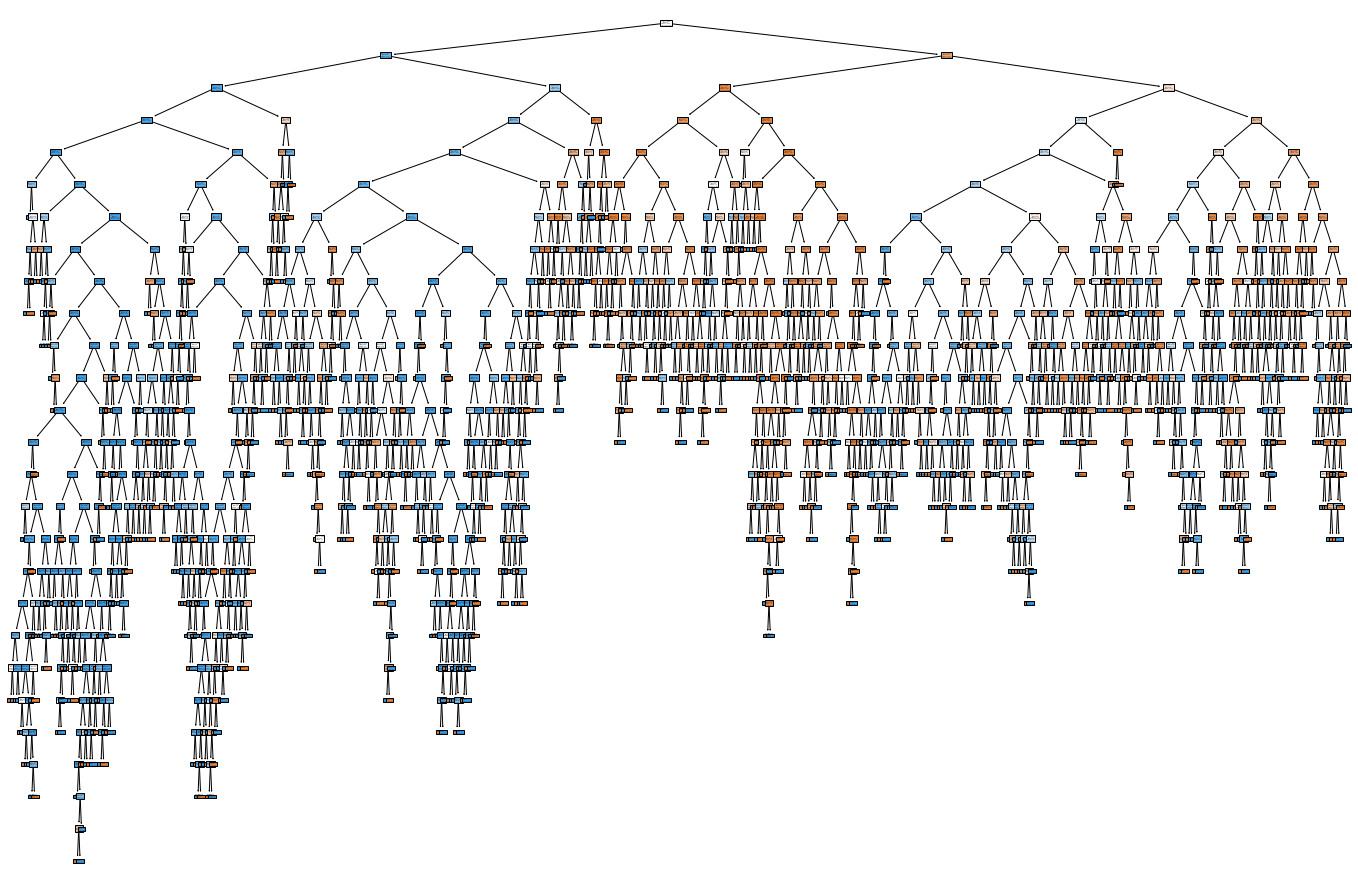

In [36]:
test_models(boosted_models,boost_dt_X_test,boost_dt_y_test)
print_trees(boosted_models)

### MultiOutput Decision Tree

In [15]:
from sklearn.multioutput import MultiOutputClassifier

multi_tree_classifier = MultiOutputClassifier(DecisionTreeClassifier(),n_jobs=4)
multi_dt_X_train, multi_dt_X_test, multi_dt_y_train, multi_dt_y_test = train_test_split(spotify_feature_scaler, spotify_target, test_size=0.33,random_state = 42)

multi_tree_classifier.fit(multi_dt_X_train,multi_dt_y_train)
multi_dt_y_pred = multi_tree_classifier.predict(multi_dt_X_test)
print("All labels Correct")
print(metrics.accuracy_score(multi_dt_y_pred,multi_dt_y_test))


print("Raw Accuracy")
raw_score = raw_accuracy(multi_dt_y_pred,multi_dt_y_test.to_numpy())
print(raw_score)


print("Hamming Loss")
ham_loss = hamming_loss(multi_dt_y_pred,multi_dt_y_test.to_numpy())
print(ham_loss)




All labels Correct
0.23885765222161273
Raw Accuracy
0.9392059537595742
Hamming Loss
0.060794046240425836


## Random Forrest

### Basic Random Forrest

In [59]:
random_dt = RandomForestClassifier(n_jobs=4)
random_dt_X_train, random_dt_X_test, random_dt_y_train, random_dt_y_test = train_test_split(spotify_feature_scaler, spotify_target, test_size=0.33,random_state = 42)
#display(random_dt_y_test)
random_dt.fit(random_dt_X_train, random_dt_y_train)
random_dt_pred = random_dt.predict(random_dt_X_test)

print("All labels Correct")
print(metrics.accuracy_score(random_dt_pred,random_dt_y_test))

print("Raw Accuracy")
raw_score = raw_accuracy(random_dt_pred,random_dt_y_test.to_numpy())
print(raw_score)

All labels Correct
0.2860326385079539
Raw Accuracy
0.9617611131427642


### Training Random Forrests on each stratified genres


In [0]:
print("Random Forest")
train_test_model(RandomForestClassifier(n_jobs=4),spotify_feature_scaler,spotify_target)


Random Forest
genre_Movie: 0.8880046583850931
genre_R&B: 0.8365627632687447
genre_A Capella: 0.9240506329113924
genre_Alternative: 0.8223748773307163
genre_Country: 0.8531211750305998
genre_Dance: 0.8551279818909977
genre_Electronic: 0.8592664404588787
genre_Anime: 0.8755510342488979
genre_Folk: 0.8465298142717498
genre_Blues: 0.8151443922095366
genre_Opera: 0.9571820677035682
genre_Hip-Hop: 0.9178484107579462
genre_Children's Music: 0.9587773415591699
genre_Children’s Music: 0.8292564393325773
genre_Rap: 0.9128651132261241
genre_Indie: 0.8460073027464677
genre_Classical: 0.9011294810934687
genre_Pop: 0.9414043583535109
genre_Reggae: 0.8289860079461047
genre_Reggaeton: 0.8839103869653768
genre_Jazz: 0.8443517329910141
genre_Rock: 0.8936274509803922
genre_Ska: 0.8695577940925389
genre_Comedy: 0.9732394366197183
genre_Soul: 0.792465410901817
genre_Soundtrack: 0.9389037223182032
genre_World: 0.8217854763491006


### Models for Random Forrests training on stratified data and Testing on Randomized Data

In [0]:
boost_dt_X_train, boost_dt_X_test, boost_dt_y_train, boost_dt_y_test = train_test_split(spotify_feature_scaler, spotify_target, test_size=0.33,random_state = 42)
boosted_models = train_models(RandomForestClassifier(n_jobs=4),boost_dt_X_train,boost_dt_y_train)

/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Movie fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_R&B fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_A Capella fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Alternative fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Country fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Dance fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Electronic fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Anime fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Folk fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Blues fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Opera fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Hip-Hop fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Children's Music fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Children’s Music fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Rap fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Indie fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Classical fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Pop fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Reggae fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Reggaeton fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Jazz fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Rock fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Ska fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Comedy fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Soul fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Soundtrack fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_World fitted


In [0]:
test_models(boosted_models,boost_dt_X_test,boost_dt_y_test)


Number of Genres: 27
Number of Songs Predicted: 58336
All labels Correct
0.06279141524958859
Raw Accuracy
0.8516321793543407


### MultiOutput Decision Tree

In [0]:
from sklearn.multioutput import MultiOutputClassifier

multi_tree_classifier = MultiOutputClassifier(DecisionTreeClassifier(),n_jobs=4)
multi_dt_X_train, multi_dt_X_test, multi_dt_y_train, multi_dt_y_test = train_test_split(spotify_feature_scaler, spotify_target, test_size=0.33,random_state = 42)

multi_tree_classifier.fit(multi_dt_X_train,multi_dt_y_train)

multi_dt_y_pred = multi_tree_classifier.predict(multi_dt_X_test)
print("All labels Correct")
print(metrics.accuracy_score(multi_dt_y_pred,multi_dt_y_test))


print("Raw Accuracy")
raw_score = raw_accuracy(multi_dt_y_pred,multi_dt_y_test.to_numpy())
print(raw_score)

All labels Correct
0.23750342841470104
Raw Accuracy
0.9392351587736941


In [3]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

display(random_grid)



{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]}

In [9]:
from sklearn.ensemble import RandomForestClassifier

search_dt_X_train, search_dt_X_test, search_dt_y_train, search_dt_y_test = train_test_split(spotify_feature_scaler, spotify_target, test_size=0.33,random_state = 42)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(verbose=2)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=10, random_state=42, n_jobs = 1)
# Fit the random search model
rf_random.fit(search_dt_X_train, search_dt_y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


[CV]  min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=0.272, total= 1.3min
[CV] min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.4s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.6min remaining:    0.0s


[CV]  min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=0.272, total= 1.3min
[CV] min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.9min remaining:    0.0s


[CV]  min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=0.269, total= 1.3min
[CV] min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=True 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   47.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.2s finished
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  4.8min remaining:    0.0s


[CV]  min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=True, score=0.251, total=  51.6s
[CV] min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=True 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   47.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.3s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.7min remaining:    0.0s


[CV]  min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=True, score=0.253, total=  52.0s
[CV] min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=True 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   47.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.4s finished
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  6.6min remaining:    0.0s


[CV]  min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=True, score=0.252, total=  52.1s
[CV] min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   52.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.5s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  7.5min remaining:    0.0s


[CV]  min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True, score=0.251, total=  56.8s
[CV] min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   52.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.6s finished
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  8.5min remaining:    0.0s


[CV]  min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True, score=0.251, total=  56.8s
[CV] min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   52.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.3s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  9.4min remaining:    0.0s


[CV]  min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True, score=0.252, total=  57.1s
[CV] min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   45.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.3s finished


[CV]  min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, score=0.253, total=  49.6s
[CV] min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   45.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.3s finished


[CV]  min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, score=0.251, total=  50.1s
[CV] min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   44.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.4s finished


[CV]  min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, score=0.249, total=  49.4s
[CV] min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=False 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.6s finished


[CV]  min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=False, score=0.264, total= 1.1min
[CV] min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=False 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.6s finished


[CV]  min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=False, score=0.264, total= 1.2min
[CV] min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=False 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.3s finished


[CV]  min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=False, score=0.265, total= 1.1min
[CV] min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.3s finished


[CV]  min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False, score=0.263, total= 1.1min
[CV] min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.0s finished


[CV]  min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False, score=0.265, total= 1.1min
[CV] min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.2s finished


[CV]  min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False, score=0.262, total= 1.1min
[CV] min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.6s finished


[CV]  min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False, score=0.273, total= 1.4min
[CV] min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.6s finished


[CV]  min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False, score=0.272, total= 1.4min
[CV] min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.6s finished


[CV]  min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False, score=0.267, total= 1.4min
[CV] min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   47.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.3s finished


[CV]  min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True, score=0.251, total=  52.2s
[CV] min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   48.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.9s finished


[CV]  min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True, score=0.253, total=  53.2s
[CV] min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   48.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.1s finished


[CV]  min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True, score=0.249, total=  52.9s
[CV] min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   41.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.0s finished


[CV]  min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True, score=0.243, total=  45.3s
[CV] min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   41.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.9s finished


[CV]  min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True, score=0.239, total=  45.3s
[CV] min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   41.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.9s finished


[CV]  min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True, score=0.240, total=  45.6s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   45.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.1s finished


[CV]  min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, score=0.249, total=  49.3s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   44.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.1s finished


[CV]  min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, score=0.252, total=  49.1s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   45.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.0s finished


[CV]  min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, score=0.246, total=  49.5s
building tree 1 of 100


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 30.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [13]:
print(rf_random.best_params_)

best_random_dt = rf_random.best_estimator_

search_dt_y_pred = best_random_dt.predict(search_dt_X_test)
print("All labels Correct")
print(metrics.accuracy_score(search_dt_y_pred,search_dt_y_test))
print("Raw Accuracy")
raw_score = raw_accuracy(search_dt_y_pred,search_dt_y_test.to_numpy())
print(raw_score)



{'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   41.1s finished


All labels Correct
0.27947111568922134
Raw Accuracy


IndexError: ignored

In [19]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

criterion = ['gini', 'entropy']

# Create the random grid
random_grid = {
               'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'ccp_alpha': ccp_alphas
               }

display(random_grid)

NameError: name 'ccp_alphas' is not defined

In [14]:
from sklearn.tree import DecisionTreeClassifier

search_dt_X_train, search_dt_X_test, search_dt_y_train, search_dt_y_test = train_test_split(spotify_feature_scaler, spotify_target, test_size=0.33,random_state = 42)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = DecisionTreeClassifier()
print(rf.get_params().keys())
path = rf.cost_complexity_pruning_path(search_dt_X_train, search_dt_y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
#print(ccp_alphas)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=10, random_state=42, n_jobs = 1)
# Fit the random search model
rf_random.fit(search_dt_X_train, search_dt_y_train)

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])


NameError: ignored

In [24]:
print(rf_random.best_params_)

best_random_dt = rf_random.best_estimator_

search_dt_y_pred = best_random_dt.predict(search_dt_X_test)
print("All labels Correct")
print(metrics.accuracy_score(search_dt_y_pred,search_dt_y_test))
print("Raw Accuracy")
raw_score = raw_accuracy(search_dt_y_pred,search_dt_y_test.to_numpy())
print(raw_score)

{'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 89, 'criterion': 'gini', 'ccp_alpha': 6.254248980401058e-07}
All labels Correct
0.32679648930334615
Raw Accuracy
0.9400148056723756


In [18]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier
display(spotify_feature_scaler.columns)
spotify_feature_scalar_selected = spotify_feature_scaler.drop(['key','time_signature','mode'],axis=1)
search_dt_X_train, search_dt_X_test, search_dt_y_train, search_dt_y_test = train_test_split(spotify_feature_scalar_selected, spotify_target, test_size=0.33,random_state = 42)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = DecisionTreeClassifier()
print(rf.get_params().keys())
#path = rf.cost_complexity_pruning_path(search_dt_X_train, search_dt_y_train)
#ccp_alphas, impurities = path.ccp_alphas, path.impurities
#print(ccp_alphas)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=10, random_state=42, n_jobs = 1)
# Fit the random search model
rf_random.fit(search_dt_X_train, search_dt_y_train)

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])


NameError: name 'RandomizedSearchCV' is not defined

In [37]:
print(rf_random.best_params_)

best_random_dt = rf_random.best_estimator_

search_dt_y_pred = best_random_dt.predict(search_dt_X_test)
print("All labels Correct")
print(metrics.accuracy_score(search_dt_y_pred,search_dt_y_test))
print("Raw Accuracy")
raw_score = raw_accuracy(search_dt_y_pred,search_dt_y_test.to_numpy())
print(raw_score)
print("Hamming Loss")
ham_loss = hamming_loss(search_dt_y_pred,search_dt_y_test.to_numpy())
print(ham_loss)


NameError: name 'rf_random' is not defined

In [26]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

from sklearn.tree import DecisionTreeClassifier




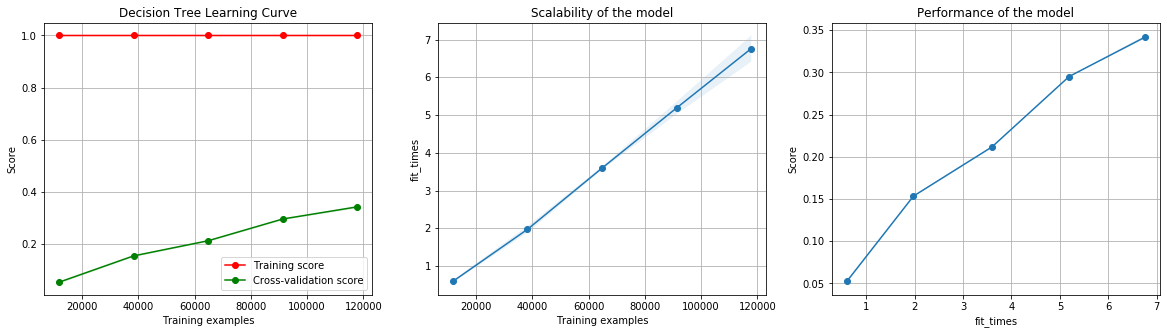

In [30]:

dt = DecisionTreeClassifier()
cv =KFold(n_splits=3, random_state=42, shuffle=True)


plot_learning_curve(dt, "Decision Tree Learning Curve",spotify_feature_scaler, spotify_target,cv = cv, n_jobs=4)
plt.show()

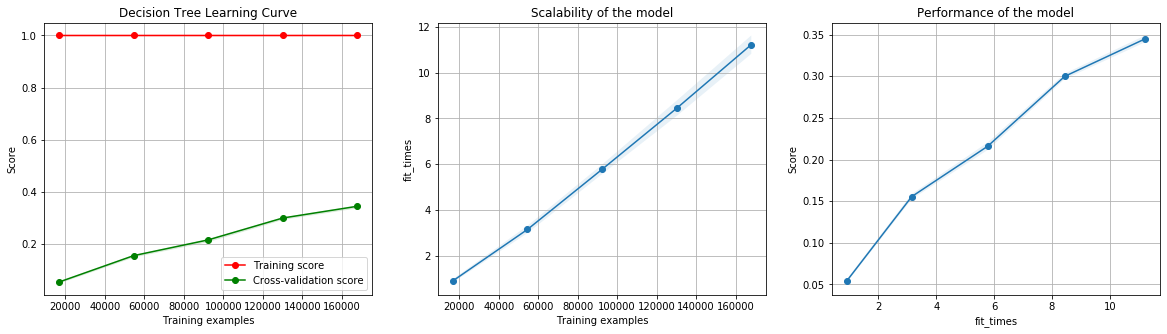

In [36]:
dt = DecisionTreeClassifier()
cv =KFold(n_splits=20, random_state=42, shuffle=True)

plot_learning_curve(dt, "Decision Tree Learning Curve",spotify_feature_scaler, spotify_target,cv = cv, n_jobs=4)
plt.show()

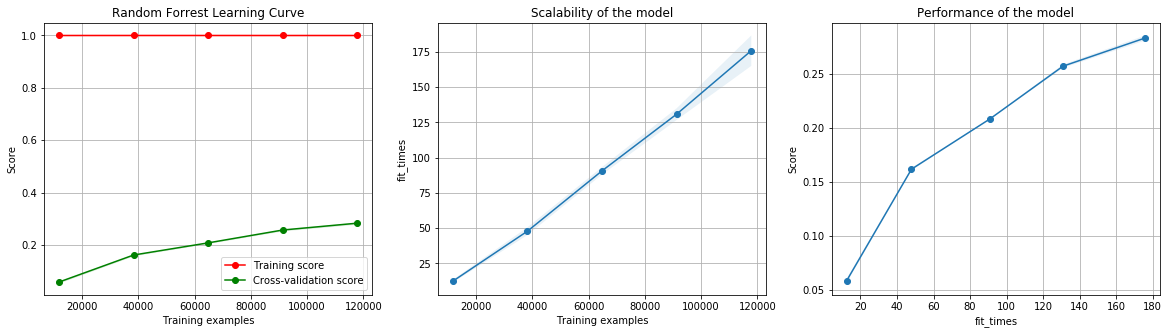

In [33]:
rf = RandomForestClassifier()
cv =KFold(n_splits=3, random_state=42, shuffle=True)
plot_learning_curve(rf, "Random Forrest Learning Curve", spotify_feature_scaler, spotify_target, cv = cv, n_jobs=4)
plt.show()

genre_Movie
Accuracy Score: 0.9467348508847355
Precision Score: 0.4455799693408278


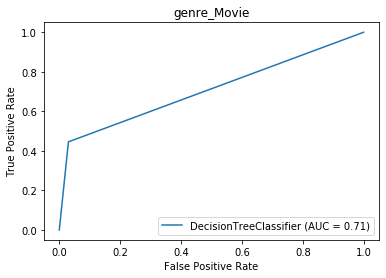

genre_R&B
Accuracy Score: 0.9201927863510884
Precision Score: 0.25906976744186044


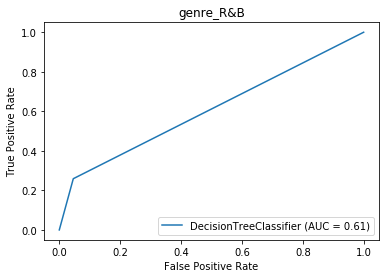

genre_A Capella
Accuracy Score: 0.9989365072181744
Precision Score: 0.21212121212121213


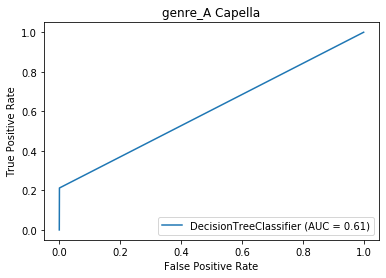

genre_Alternative
Accuracy Score: 0.914920577453953
Precision Score: 0.24809673085535155


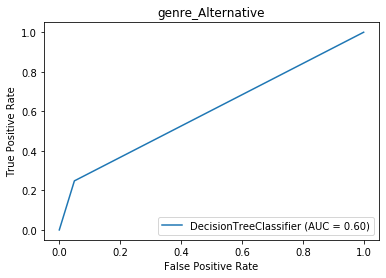

genre_Country
Accuracy Score: 0.929945241435489
Precision Score: 0.3194768799626343


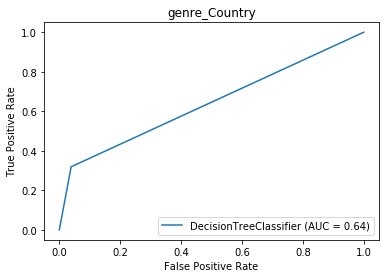

genre_Dance
Accuracy Score: 0.9245372675023759
Precision Score: 0.2679864799613713


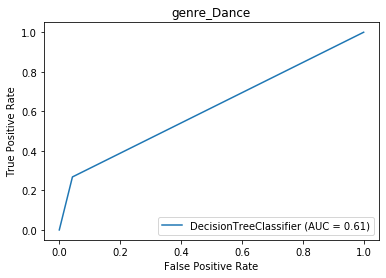

genre_Electronic
Accuracy Score: 0.9349685477666652
Precision Score: 0.41677531508039983


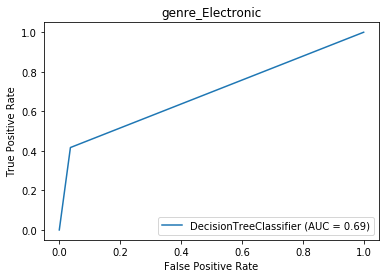

genre_Anime
Accuracy Score: 0.9415305245055889
Precision Score: 0.4612369337979094


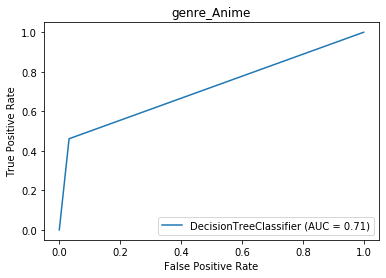

genre_Folk
Accuracy Score: 0.9177490157034892
Precision Score: 0.2770526315789474


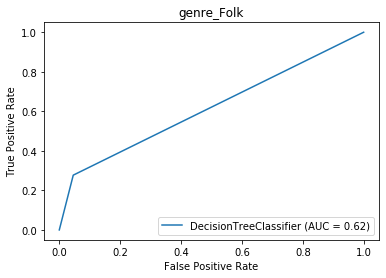

genre_Blues
Accuracy Score: 0.9228854595646467
Precision Score: 0.30116175156389635


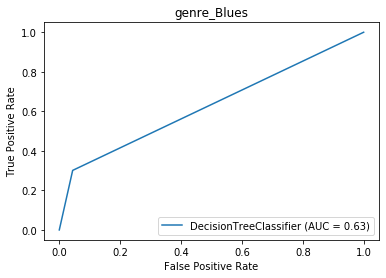

genre_Opera
Accuracy Score: 0.9723265601665384
Precision Score: 0.7354368932038835


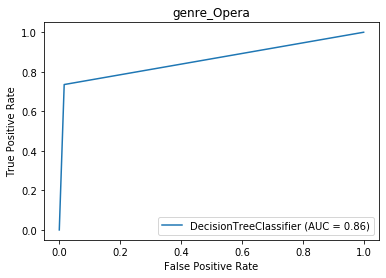

genre_Hip-Hop
Accuracy Score: 0.9448793953930398
Precision Score: 0.4885430177258971


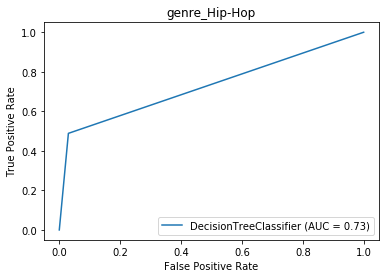

genre_Children's Music
Accuracy Score: 0.9767162963298185
Precision Score: 0.6521084337349398


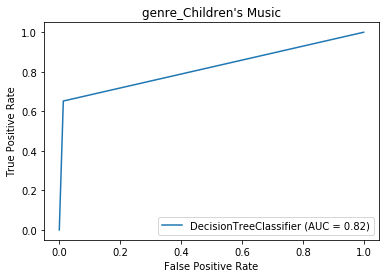

genre_Children’s Music
Accuracy Score: 0.9158483051998009
Precision Score: 0.2639616055846422


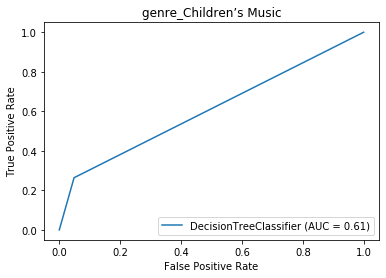

genre_Rap
Accuracy Score: 0.9429786848893515
Precision Score: 0.47316444826105625


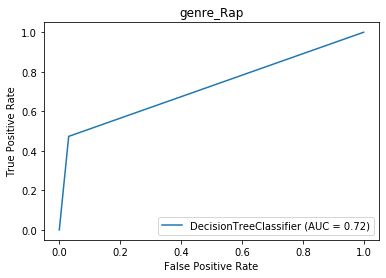

genre_Indie
Accuracy Score: 0.9145359098520162
Precision Score: 0.2635529608006672


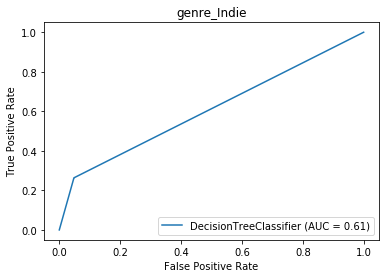

genre_Classical
Accuracy Score: 0.9489523464723718
Precision Score: 0.5547016274864376


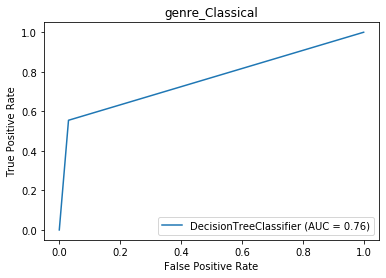

genre_Pop
Accuracy Score: 0.9498121917002308
Precision Score: 0.5424752048296679


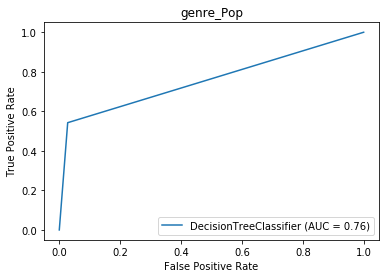

genre_Reggae
Accuracy Score: 0.9291080237136263
Precision Score: 0.3140995812005584


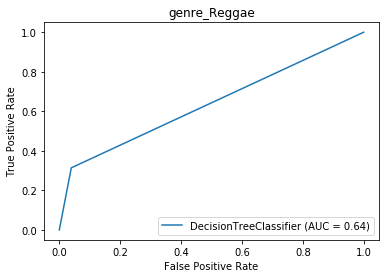

genre_Reggaeton
Accuracy Score: 0.939969226591845
Precision Score: 0.45796847635726795


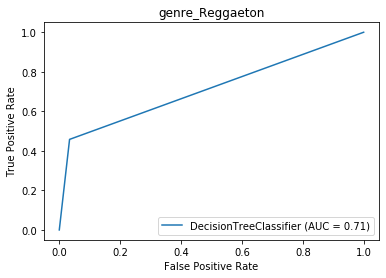

genre_Jazz
Accuracy Score: 0.922116124360773
Precision Score: 0.3091746962714705


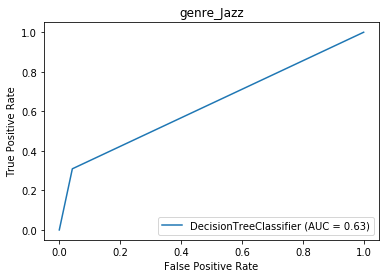

genre_Rock
Accuracy Score: 0.933316739828936
Precision Score: 0.41830624465355004


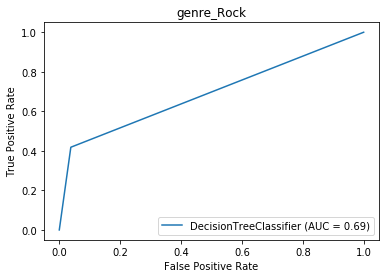

genre_Ska
Accuracy Score: 0.9402633841697968
Precision Score: 0.4593280282935455


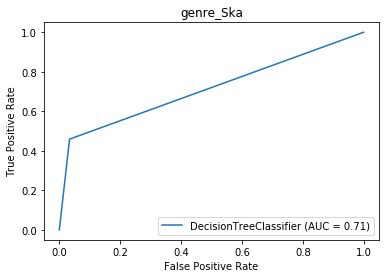

genre_Comedy
Accuracy Score: 0.9914468027334027
Precision Score: 0.9297820823244553


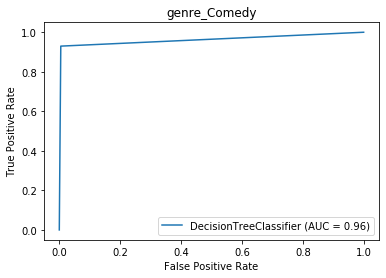

genre_Soul
Accuracy Score: 0.9105082137846766
Precision Score: 0.1933941764450239


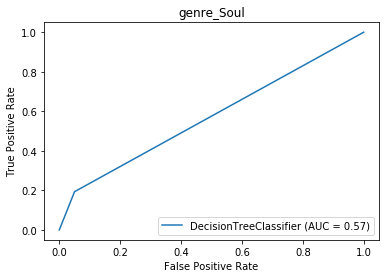

genre_Soundtrack
Accuracy Score: 0.9581617414128615
Precision Score: 0.6370280146163215


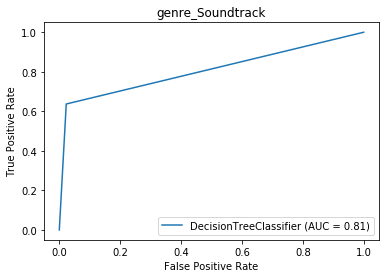

genre_World
Accuracy Score: 0.9310313617233108
Precision Score: 0.3539938891313837


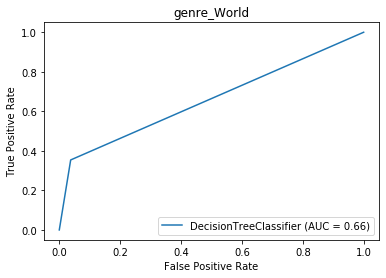

In [76]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
    
import numpy as np

#ax = plt.figure()
for genre in genre_column_list:
    X_train_roc, X_test_roc, y_train_roc, y_test_roc = train_test_split(spotify_feature_scaler, spotify_target[genre], random_state=42)
    rfc = DecisionTreeClassifier()
    rfc.fit(X_train_roc, y_train_roc)
    y_pred_roc = rfc.predict(X_test_roc)
    print(genre)
    print("Accuracy Score:",accuracy_score(y_pred_roc,y_test_roc))
    print("Precision Score:",precision_score(y_pred_roc,y_test_roc))

    svc_disp1 = plot_roc_curve(rfc, np.asarray(X_test_roc), np.asarray(y_test_roc))
    plt.title(genre)
    plt.show()




genre_Movie
Accuracy Score: 0.9635697153459746
Precision Score: 0.27695452222789985


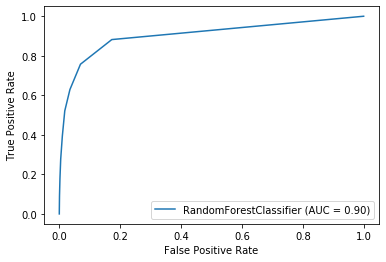

genre_R&B
Accuracy Score: 0.9507399194460786
Precision Score: 0.05813953488372093


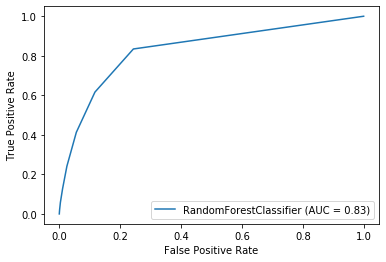

genre_A Capella
Accuracy Score: 0.9992759198081187
Precision Score: 0.030303030303030304


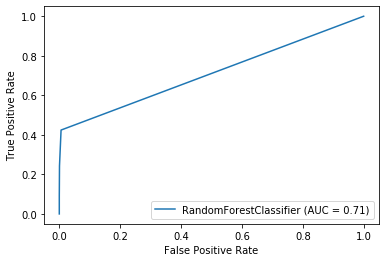

genre_Alternative
Accuracy Score: 0.9489297189663756
Precision Score: 0.09941782355575458


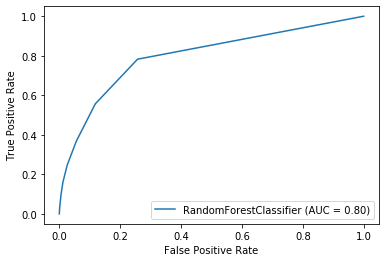

genre_Country
Accuracy Score: 0.9553785581753179
Precision Score: 0.17468472676319477


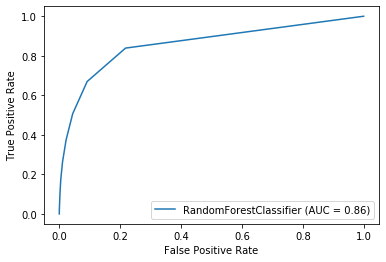

genre_Dance
Accuracy Score: 0.951780784721908
Precision Score: 0.07098020280057943


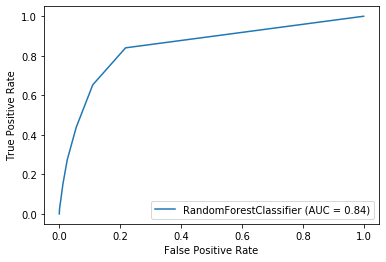

genre_Electronic
Accuracy Score: 0.9592931167126759
Precision Score: 0.30073880921338547


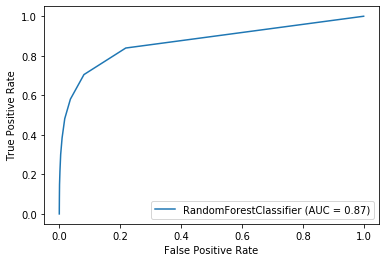

genre_Anime
Accuracy Score: 0.9611485722043717
Precision Score: 0.32752613240418116


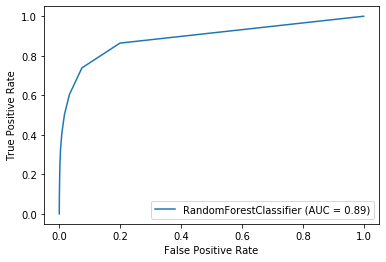

genre_Folk
Accuracy Score: 0.946847988414717
Precision Score: 0.10736842105263159


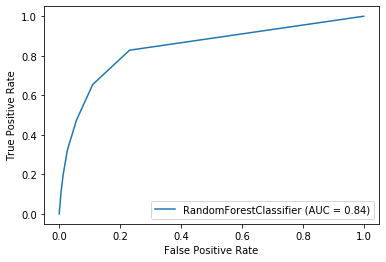

genre_Blues
Accuracy Score: 0.9513961171199711
Precision Score: 0.09919571045576407


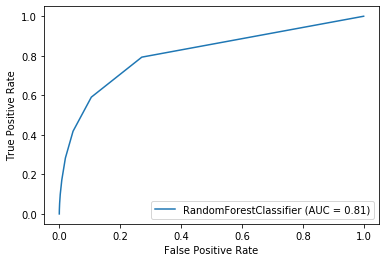

genre_Opera
Accuracy Score: 0.980743992397158
Precision Score: 0.7111650485436893


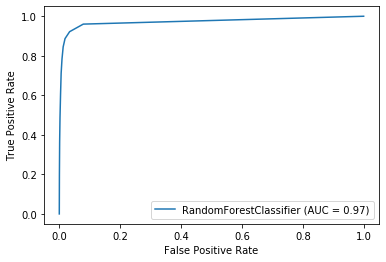

genre_Hip-Hop
Accuracy Score: 0.9589763316287279
Precision Score: 0.40250756593169046


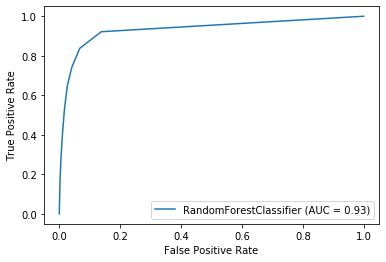

genre_Children's Music
Accuracy Score: 0.9837987057066571
Precision Score: 0.6076807228915663


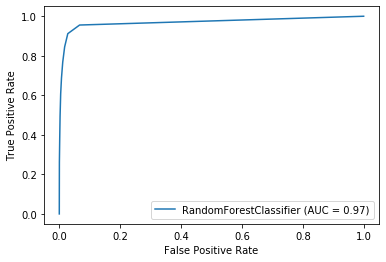

genre_Children’s Music
Accuracy Score: 0.9483187763044757
Precision Score: 0.10602094240837696


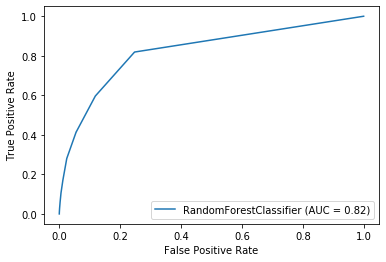

genre_Rap
Accuracy Score: 0.9589537041227316
Precision Score: 0.39158437097466725


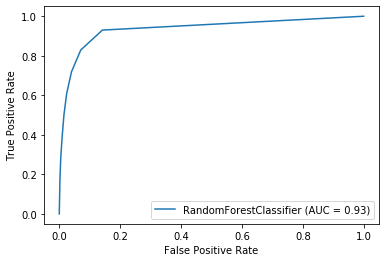

genre_Indie
Accuracy Score: 0.9449472779110286
Precision Score: 0.06755629691409508


In [ ]:
#ax = plt.figure()
for genre in genre_column_list:
    X_train_roc, X_test_roc, y_train_roc, y_test_roc = train_test_split(spotify_feature_scaler, spotify_target[genre], random_state=42)
    rfc = RandomForestClassifier(n_estimators=10, random_state=42)
    rfc.fit(X_train_roc, y_train_roc)
    y_pred_roc = rfc.predict(X_test_roc)
    print(genre)
    print("Accuracy Score:",accuracy_score(y_pred_roc,y_test_roc))
    print("Precision Score:",precision_score(y_pred_roc,y_test_roc))
    svc_disp1 = plot_roc_curve(rfc, np.asarray(X_test_roc), np.asarray(y_test_roc))
    plt.show()

## TODO:

Adi:
PCA Visuals in 2 or 3 dimensions  
Main thing: all of one genre in one color  
KNN:  
new Accuracy metric, top 1 or 2 correct  
Grid search for hyper parameter training


Keeshan:
basic decision tree stuff:    
multi class accuracy  
       convert to true or false  
       take all trues  
           keep them   
           40% of the total dataset  
           60% falses should be equally distributed in the 26 genres (not number but % distributed)  